In [1]:
# Base Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Feature engineering imports
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

In [16]:
# Model selection imports
from sklearn.model_selection import cross_val_score, cross_val_predict

In [64]:
# Algorithm imports
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# Metrics imports
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

In [56]:
# Plot settings
%matplotlib inline
sns.axes_style()
sns.set(rc={"figure.figsize": (12, 6)})
sns.set_palette("gray")
sns.set_style('ticks', {'grid.color' : '1.0'})

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
X.shape, y.shape

((70000, 784), (70000,))

In total there are 70,000 images with 784 features each

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
sgd_clf = SGDClassifier(max_iter = 1000,
                        tol = 1e-3,
                        random_state = 20130810)

In [15]:
cross_val_score(sgd_clf, x_train, y_train_5, cv = 10, scoring = 'accuracy')

array([0.95867355, 0.9655    , 0.96566667, 0.96333333, 0.97033333,
       0.959     , 0.96966667, 0.96533333, 0.91166667, 0.93999   ])

In [18]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv = 3)

In [21]:
confusion_matrix(y_train_5, y_train_pred)

array([[53948,   631],
       [ 1299,  4122]], dtype=int64)

In [24]:
precision_score(y_train_5, y_train_pred)

0.8672417420576478

In [25]:
recall_score(y_train_5, y_train_pred)

0.7603763143331489

In [27]:
f1_score(y_train_5, y_train_pred)

0.8103007666601141

In [32]:
y_scores = cross_val_predict(sgd_clf, 
                             x_train, y_train_5,
                             cv = 3,
                             method = 'decision_function')

In [38]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores[:, 1])

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

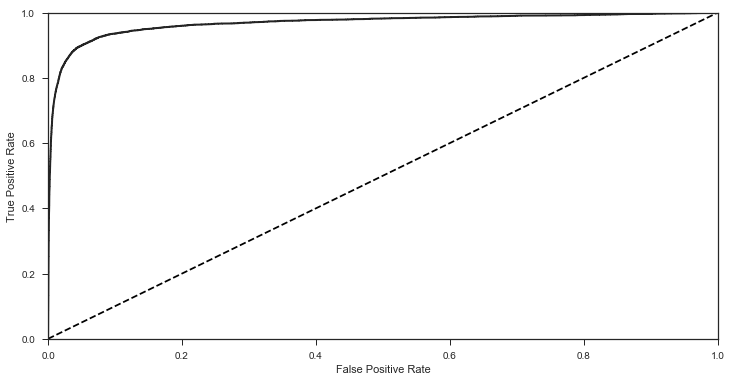

In [57]:
plot_roc_curve(fpr, tpr)

In [46]:
rf_clf = RandomForestClassifier(random_state = 20130810)

In [49]:
%time
y_probs_rf = cross_val_predict(rf_clf, x_train, y_train_5, cv = 10, method = 'predict_proba')

Wall time: 0 ns


In [51]:
y_scores_rf = y_probs_rf[:, 1]

In [52]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_5, y_scores_rf)

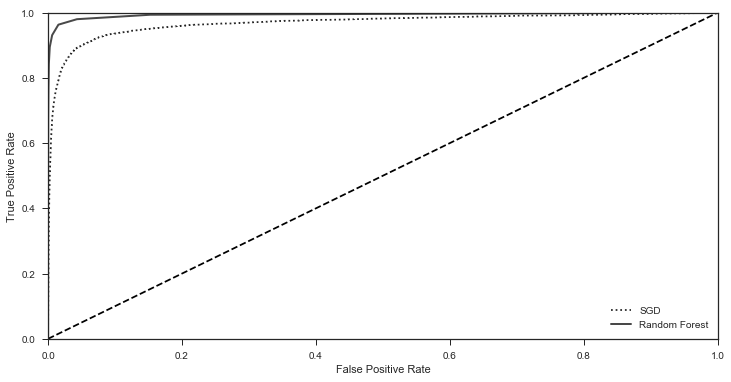

In [58]:
plt.plot(fpr, tpr, ':', label = 'SGD')
plot_roc_curve(fpr_rf, tpr_rf, 'Random Forest')
plt.legend(loc = 'lower right')

In [59]:
rf_clf = RandomForestClassifier()

In [60]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [66]:
y_multilabel

array([[False,  True],
       [False, False],
       [ True,  True],
       ...,
       [ True, False],
       [ True,  True],
       [False, False]])